## Tabular data classification with Deep Learning
Welcome! This notebook introduces some of the basics of data preprocessing for numerical and tabular data in order to classify it using Deep Learning. This notebook includes a custom dataset so that you can use your own data later on as long as they are the same file type (.csv).

You can find more tutorials and notebooks like this [here](https://github.com/sebaspv/do-it-in-keras).

### Libraries used
We are going to use Pandas to read the dataset and do some basic preprocessing on it, and we are also going to use Keras with the TensorFlow backend to create and train our neural network. Scikit-Learn is used for more data preprocessing, and Matplotlib is used to graph the Neural Network's performance.

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

### Data preprocessing
We are going to be applying some changes to our data in order to train our model succesfully. Specifically, we are going to encode its classification labels so that they are compatible with Neural Networks.

In [19]:
# read the data with Pandas
dataset = pd.read_csv('./wheat-seeds.csv')
# add column names
dataset.columns = ['t1','t2','t3','t4','t5','t6','t7','class']
# separate the features and the labels from the dataset
X = dataset.drop('class', axis = 1) # features
y = dataset['class'] # labels

### Label encoding and splitting
You might wonder why we split the dataset before transforming it. We do this because this prevents a data leakage from the encoder by making the target labels based on both the training and testing data, which makes our model "cheat" based on these labels.

In [20]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# encode y_train and y_test separately to avoid data leakage
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_train = encoder.transform(y_train)
encoded_test = encoder.transform(y_test)
# transform the encoded labels to categorical so that the model can undersand them
cat_train = to_categorical(encoded_train, dtype='float64')
cat_test = to_categorical(encoded_test, dtype='float64')

### Neural network
It's time to implement the neural network! You can use any quantity of neurons per layer or layers, you only need to care about the output layer: It needs to be the same as the quantity of labels that are available in your dataset. In this example we have 3 labels, so our last layer must have 3 neurons.

In [24]:
model = keras.models.Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) # categorical_crossentropy is used with multi-label classification problems, like this one.

In [25]:
# create an early stop call to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_acc',mode='max',patience=20) # we want to maximize the validation accuracy

In [28]:
# train the model
model.fit(X_train.values,cat_train,epochs=500,batch_size=16,callbacks=[early_stop],validation_data=(X_test.values,cat_test))

Train on 167 samples, validate on 42 samples
Epoch 1/500
167/167 [==============================] - 0s 731us/sample - loss: 0.5550 - acc: 0.7545 - val_loss: 0.6512 - val_acc: 0.6667
Epoch 2/500
167/167 [==============================] - 0s 635us/sample - loss: 0.5576 - acc: 0.7605 - val_loss: 0.6452 - val_acc: 0.6190
Epoch 3/500
167/167 [==============================] - 0s 634us/sample - loss: 0.5449 - acc: 0.7605 - val_loss: 0.6463 - val_acc: 0.6905
Epoch 4/500
167/167 [==============================] - 0s 634us/sample - loss: 0.5466 - acc: 0.7485 - val_loss: 0.6339 - val_acc: 0.6429
Epoch 5/500
167/167 [==============================] - 0s 641us/sample - loss: 0.5387 - acc: 0.7784 - val_loss: 0.6306 - val_acc: 0.6429
Epoch 6/500
167/167 [==============================] - 0s 620us/sample - loss: 0.5365 - acc: 0.7665 - val_loss: 0.6337 - val_acc: 0.6429
Epoch 7/500
167/167 [==============================] - 0s 637us/sample - loss: 0.5318 - acc: 0.7665 - val_loss: 0.6336 - val_acc: 0.6

### After training
Our model is pretty good! We achieved a final validation accuracy of 81%. Try to modify the layers or neurons in each of them to see if you get a better accuracy! If you do, feel free to create a pull request [here!](https://github.com/sebaspv/do-it-in-keras/tree/main).
Now, we need to monitor our model's accuracy to see how it progressed with each epoch. By doing this, we can see where the peak accuracy was to train it again only in that quantity of epochs.

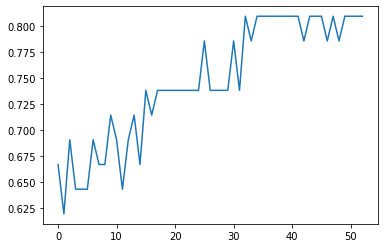

In [29]:
# plot our model validation accuracy
training_history = model.history.history['val_acc']
plt.plot(training_history)

### Conclusion
Our model did pretty good. The top validation accuracy was also the last epoch, so there's no need to train the model again. As you can see, tabular data is easier to train models with since they're pure numerical data.
### Task
Try implementing your own multi-label classification neural network on tabular data!